In [1]:
%pylab inline
import matplotlib.pyplot as plt
import PIL
import numpy as np
from glob import glob
from scipy.cluster.vq import kmeans

Populating the interactive namespace from numpy and matplotlib


In [2]:
def dist(c1, c2):
    return ((c1 - c2)**2).sum()

In [3]:
def apply_cut(img, classes, centers):
    assert len(centers) == 2
    result = img // 4
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            result[x][y] += centers[classes[x][y]]
    result = np.clip(result, 0, 255)
    return result

In [4]:
def process_img(img_file, cut_func, centers, show=False):
    img = np.array(PIL.Image.open(img_file))[:, :, :3].astype('int64')

    centers = np.array(centers)
    classes = cut_func(img, centers)
    penalty = get_penalty(img, classes, centers)
    clustered = apply_cut(img, classes, centers)
    
    if show:
        fig = plt.figure(figsize=(16, 8))
        fig.add_subplot(1, 2, 1)
        plt.imshow(img)

        fig.add_subplot(1, 2, 2)
        plt.imshow(clustered)
        plt.show()

    return penalty

In [5]:
def simple_get_centers(img_file):
    img = np.array(PIL.Image.open(img_file))[:, :, :3].astype('float').reshape((-1, 3))
    return kmeans(img.astype('float'), 2)[0].astype('int64')

In [6]:
def get_penalty(img, classes, centers):
    assert len(centers) == 2
    result = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            result += dist(img[x][y], centers[classes[x][y]])
    return result

In [7]:
def simple_cut(img, centers):
    assert len(centers) == 2
    classes = np.zeros_like(img[:, :, 0])
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if dist(img[x][y], centers[0]) < dist(img[x][y], centers[1]):
                classes[x][y] = 0
            else:
                classes[x][y] = 1
    return classes

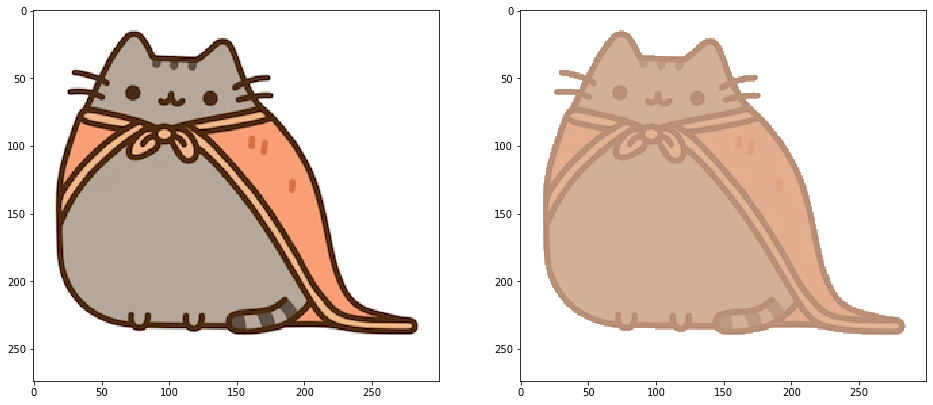

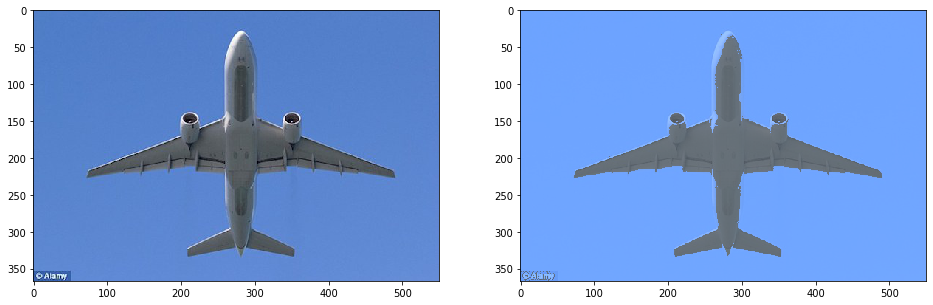

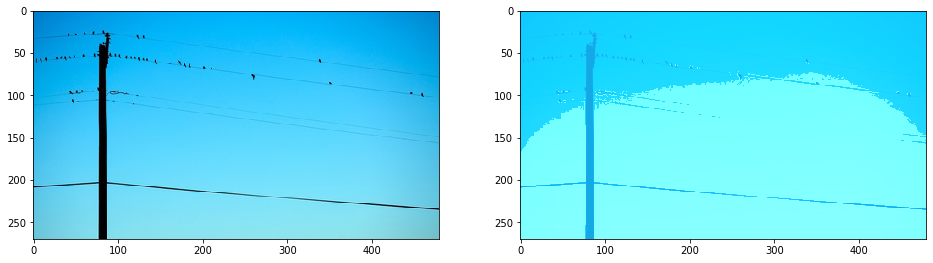

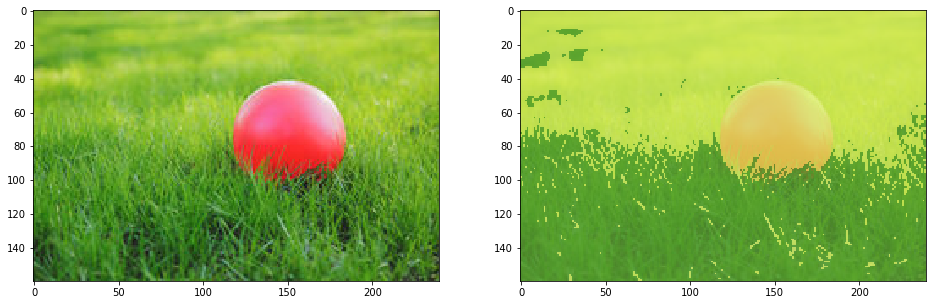

In [8]:
for img in glob('imgs/*'):
    c = simple_get_centers(img)
    process_img(img, simple_cut, c, True)

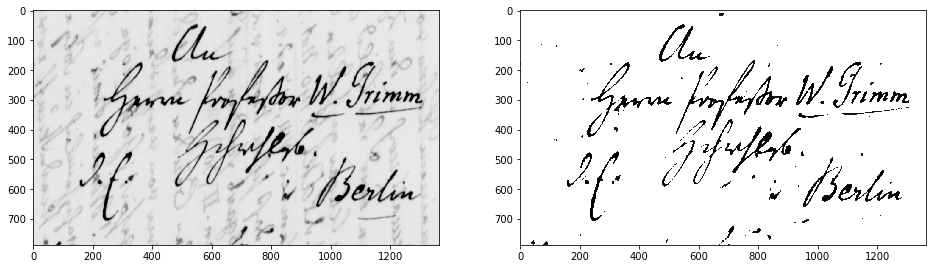

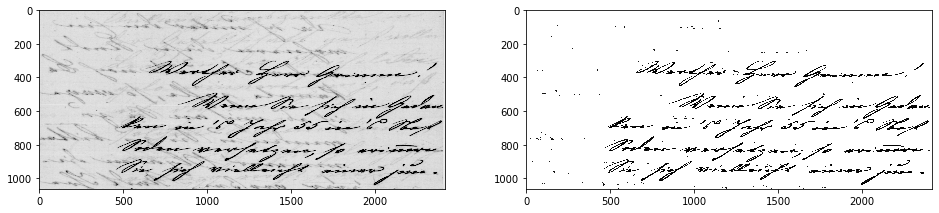

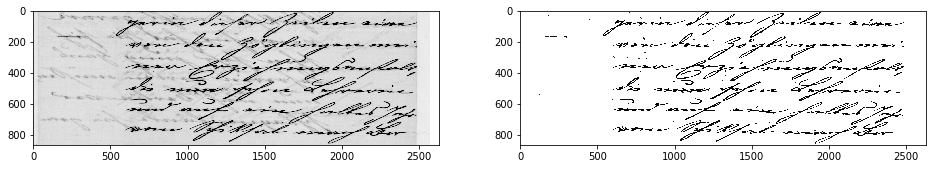

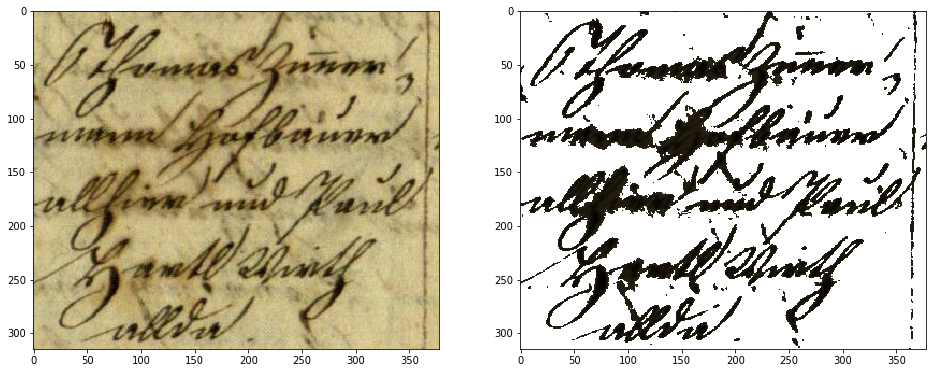

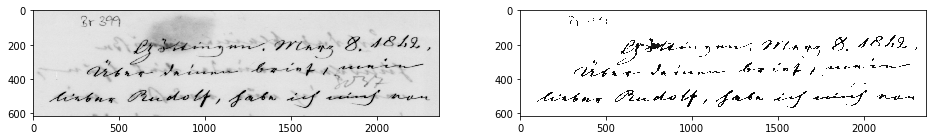

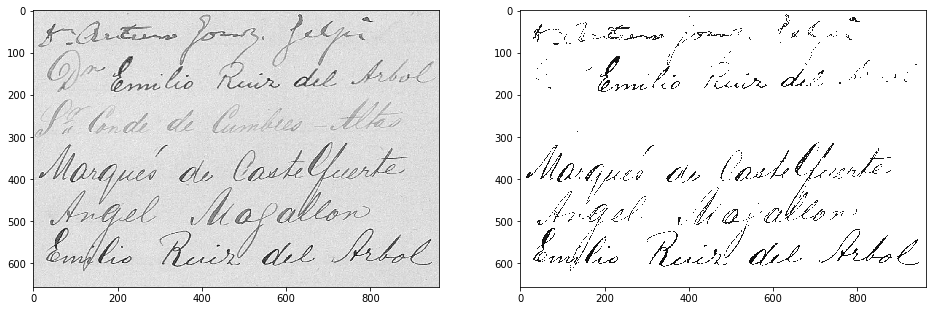

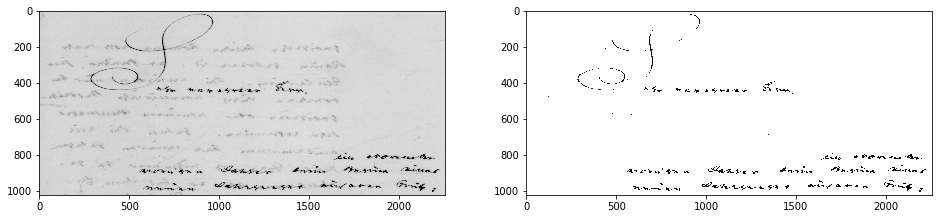

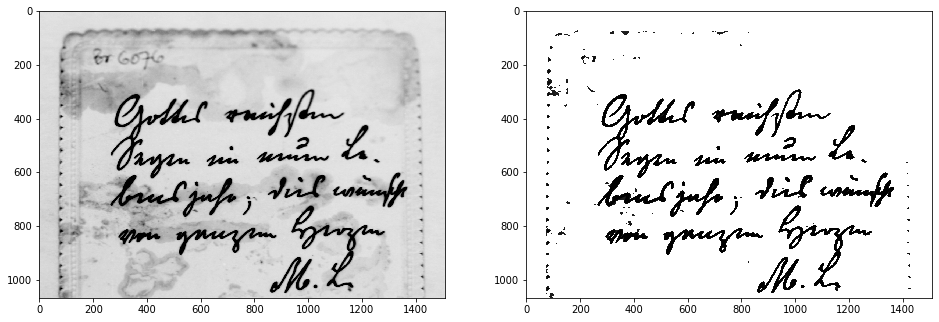

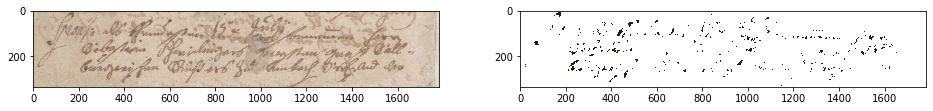

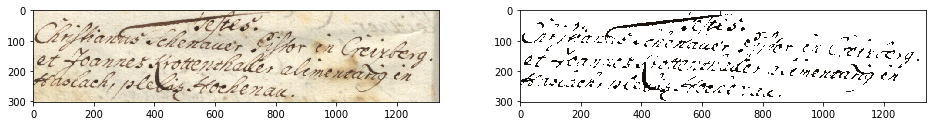

In [9]:
for img in glob('DIPCO2016_dataset/*'):
    process_img(img, simple_cut, [[0, 0, 0], [255, 255, 255]], True)

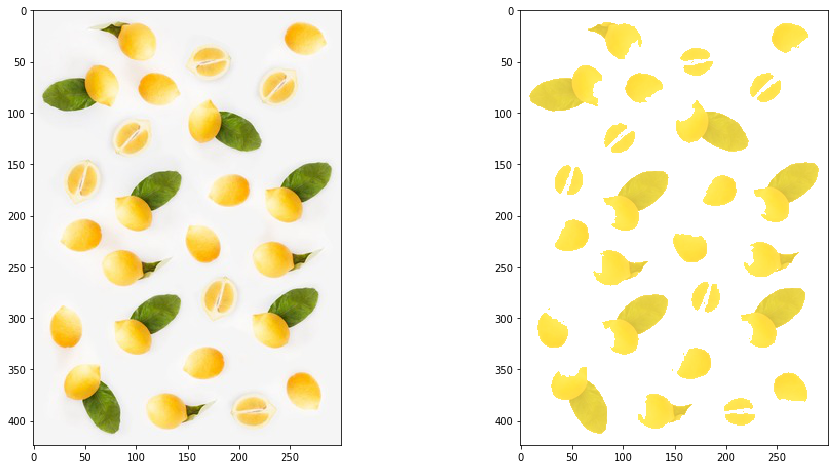

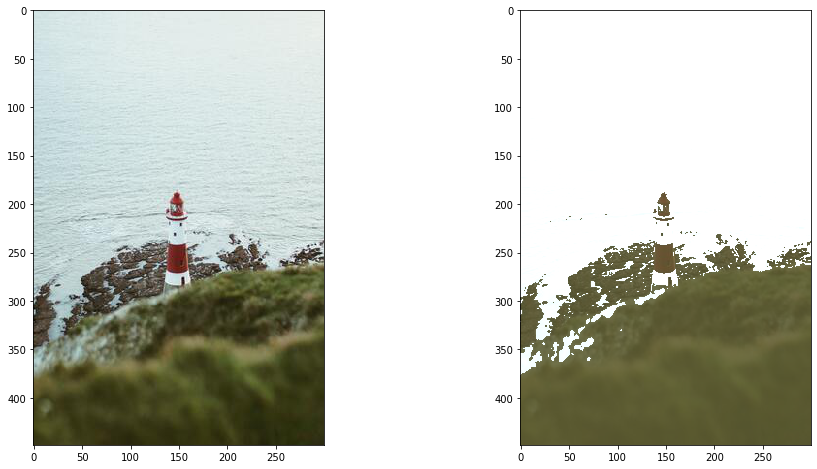

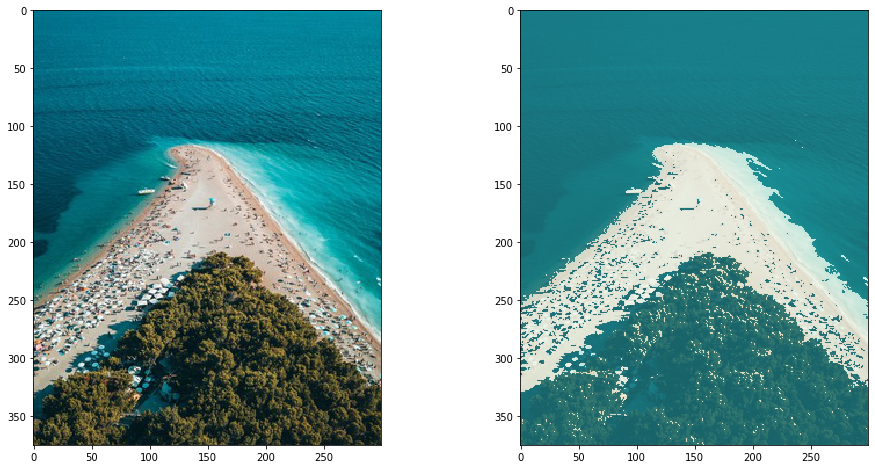

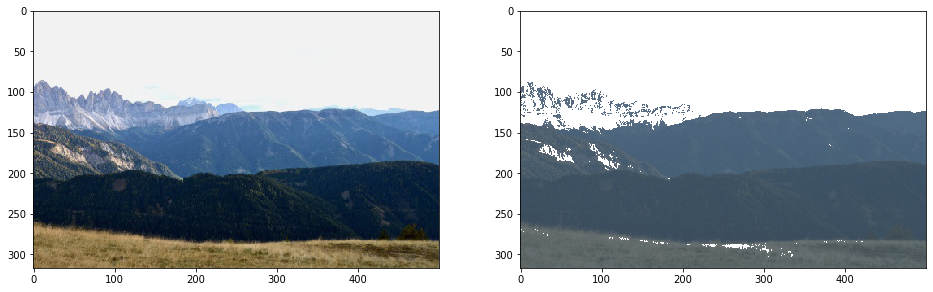

In [10]:
for img in glob('imgs_multicolor/*'):
    c = simple_get_centers(img)
    process_img(img, simple_cut, c, True)